## **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.5 MB/s eta 0:00:00


## **Import all necessary Libraries**

In [2]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Download Dataset From Roboflow**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NdtJjcJiaqyh6kXqq34s")
project = rf.workspace("yuanshen-76tm5").project("traffic-light-pu1o5")
version = project.version(1)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to traffic-light-1 in yolov11:: 100%|██████████| 4106/4106 [00:00<00:00, 5758.17it/s]


# **Custom Training**

In [2]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/traffic-light-1/data.yaml epochs=200 imgsz=640 plots=True

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/traffic-light-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

# **View Training Results**

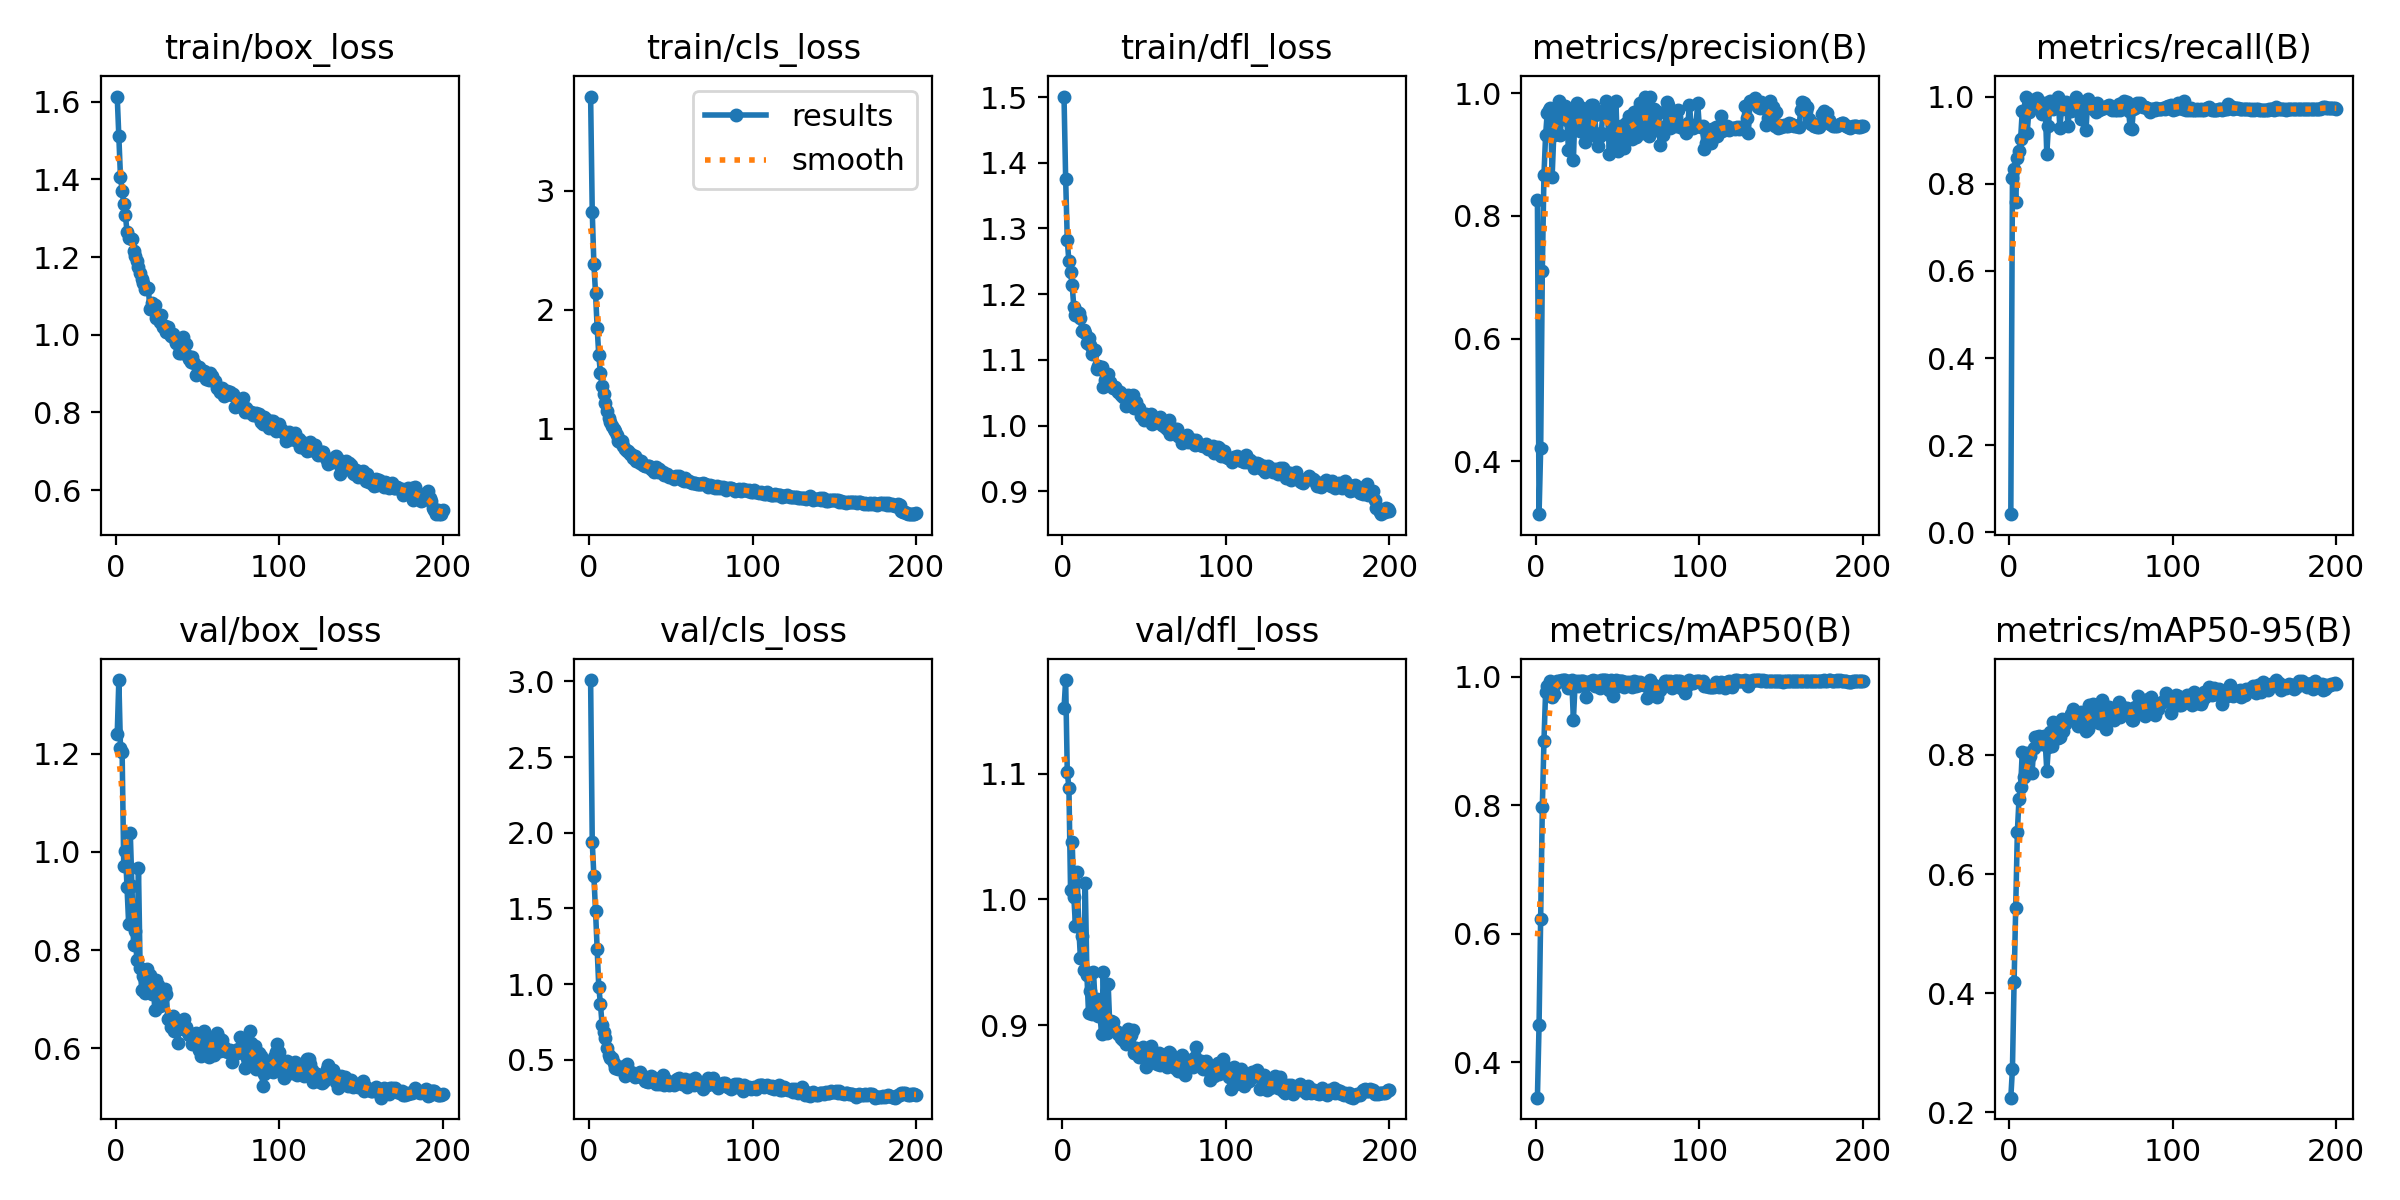

In [6]:
from IPython.display import Image
display(Image(filename='/content/runs/detect/train/results.png', width=600))

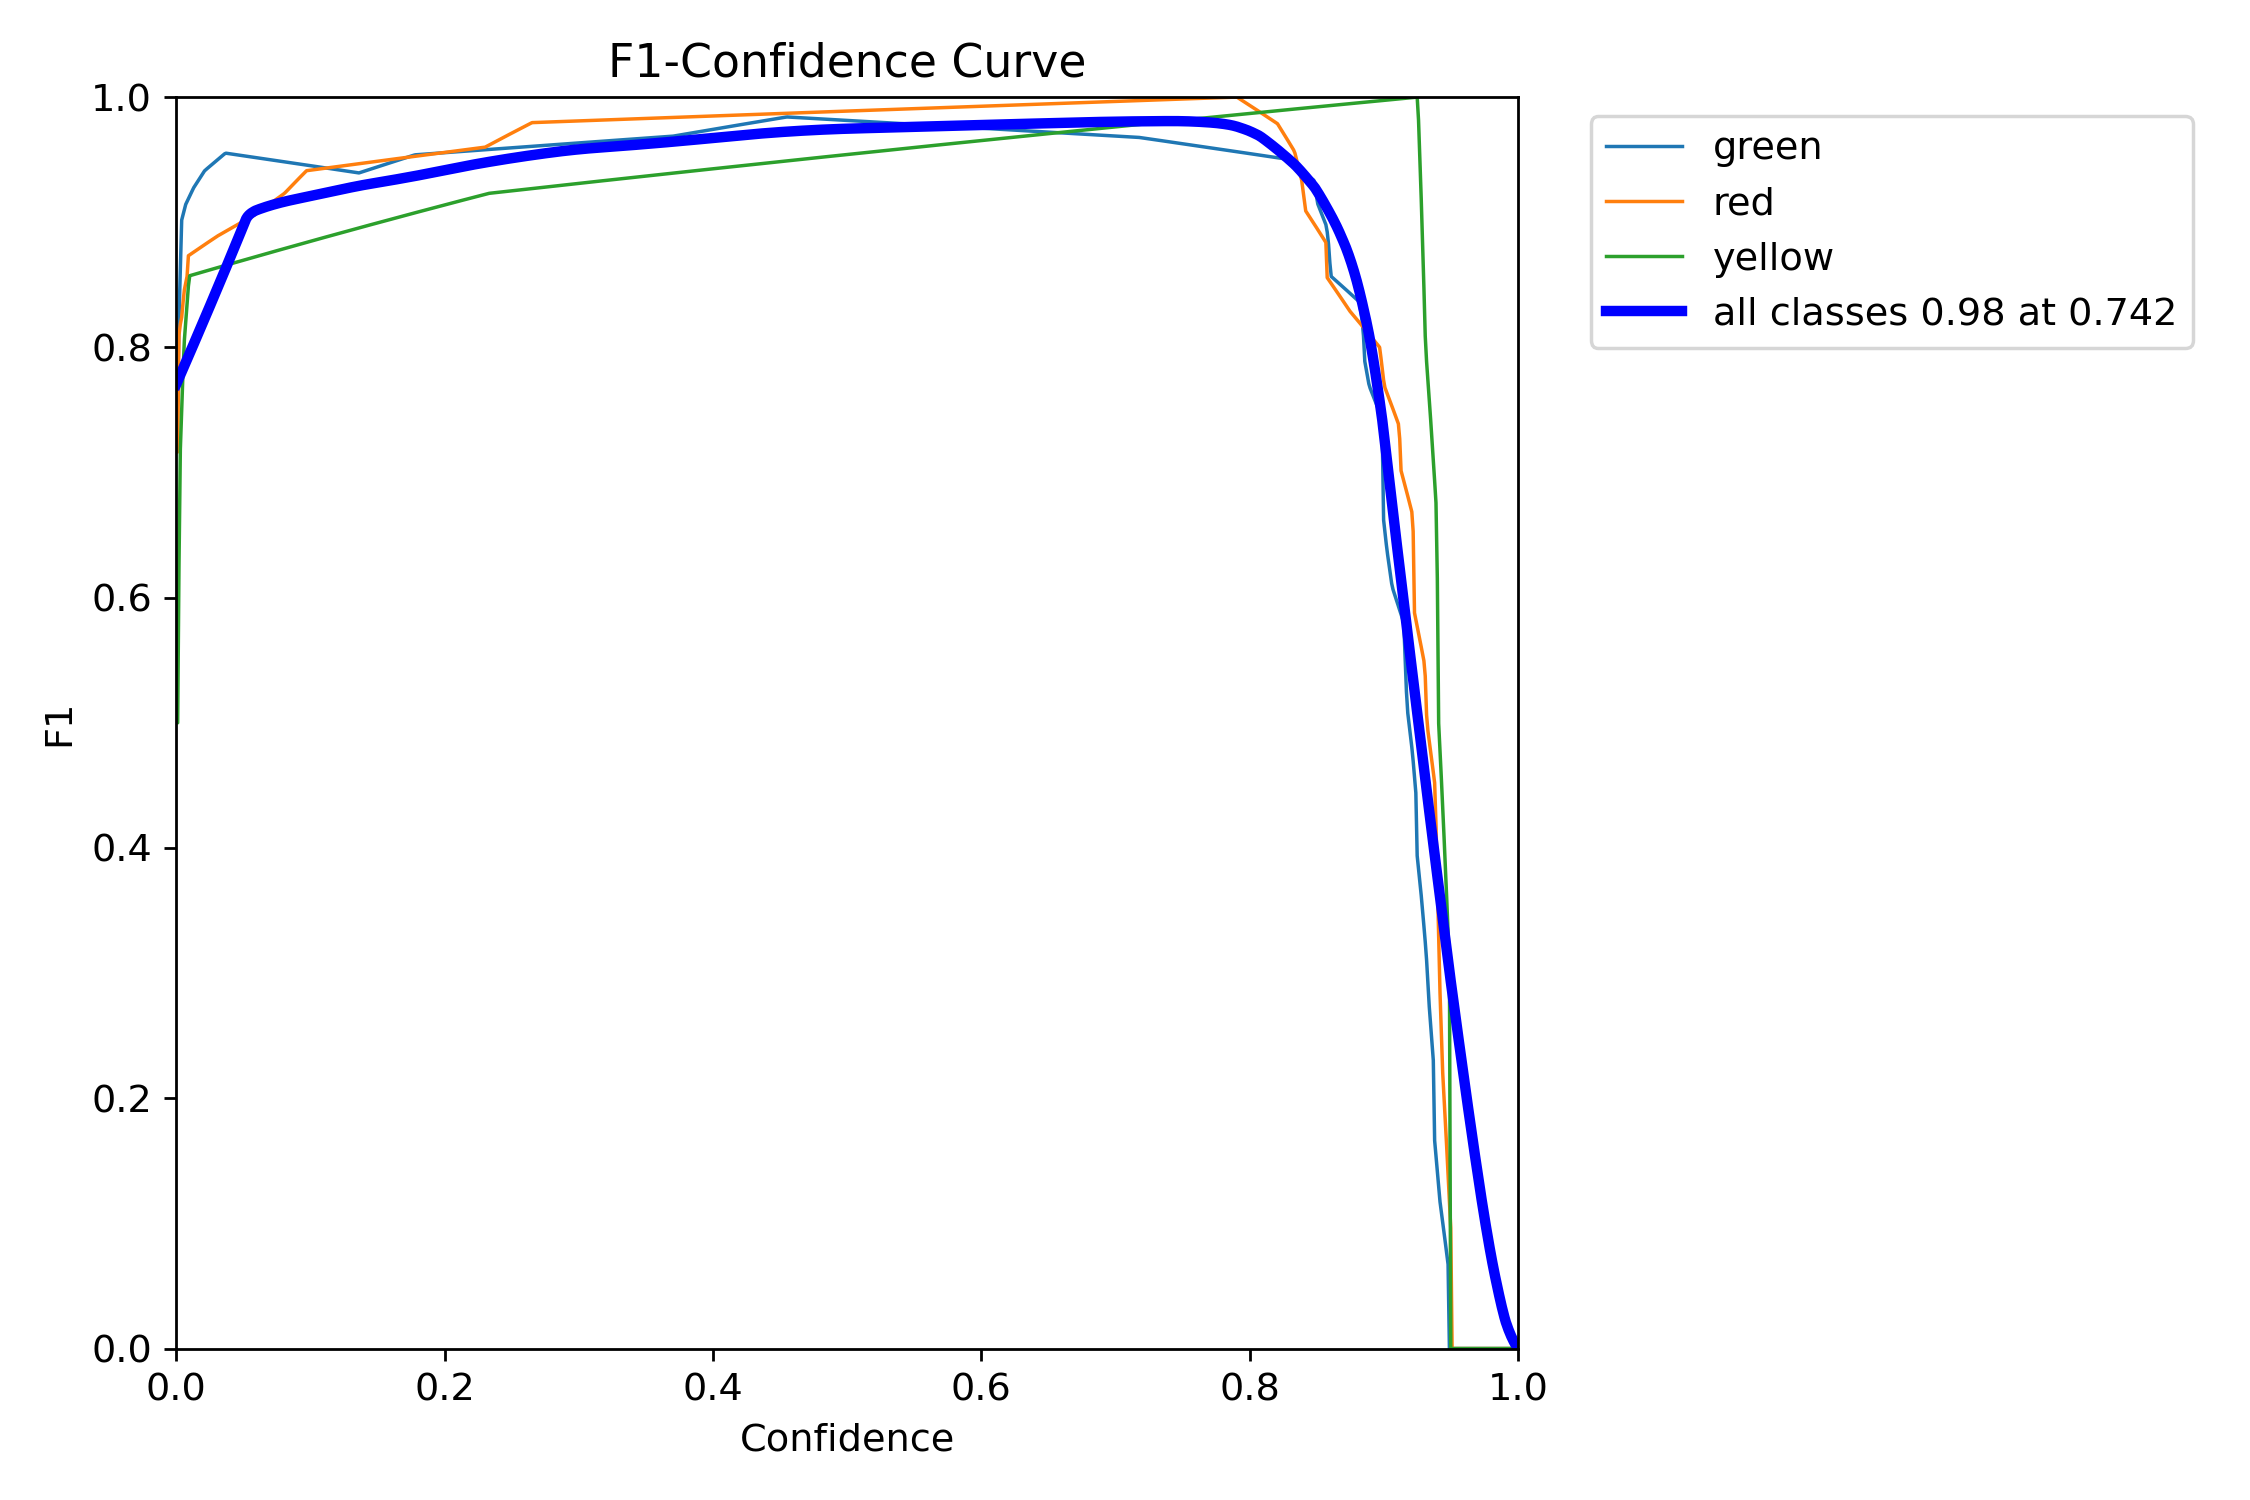

In [7]:
display(Image(filename='/content/runs/detect/train/BoxF1_curve.png', width=600))

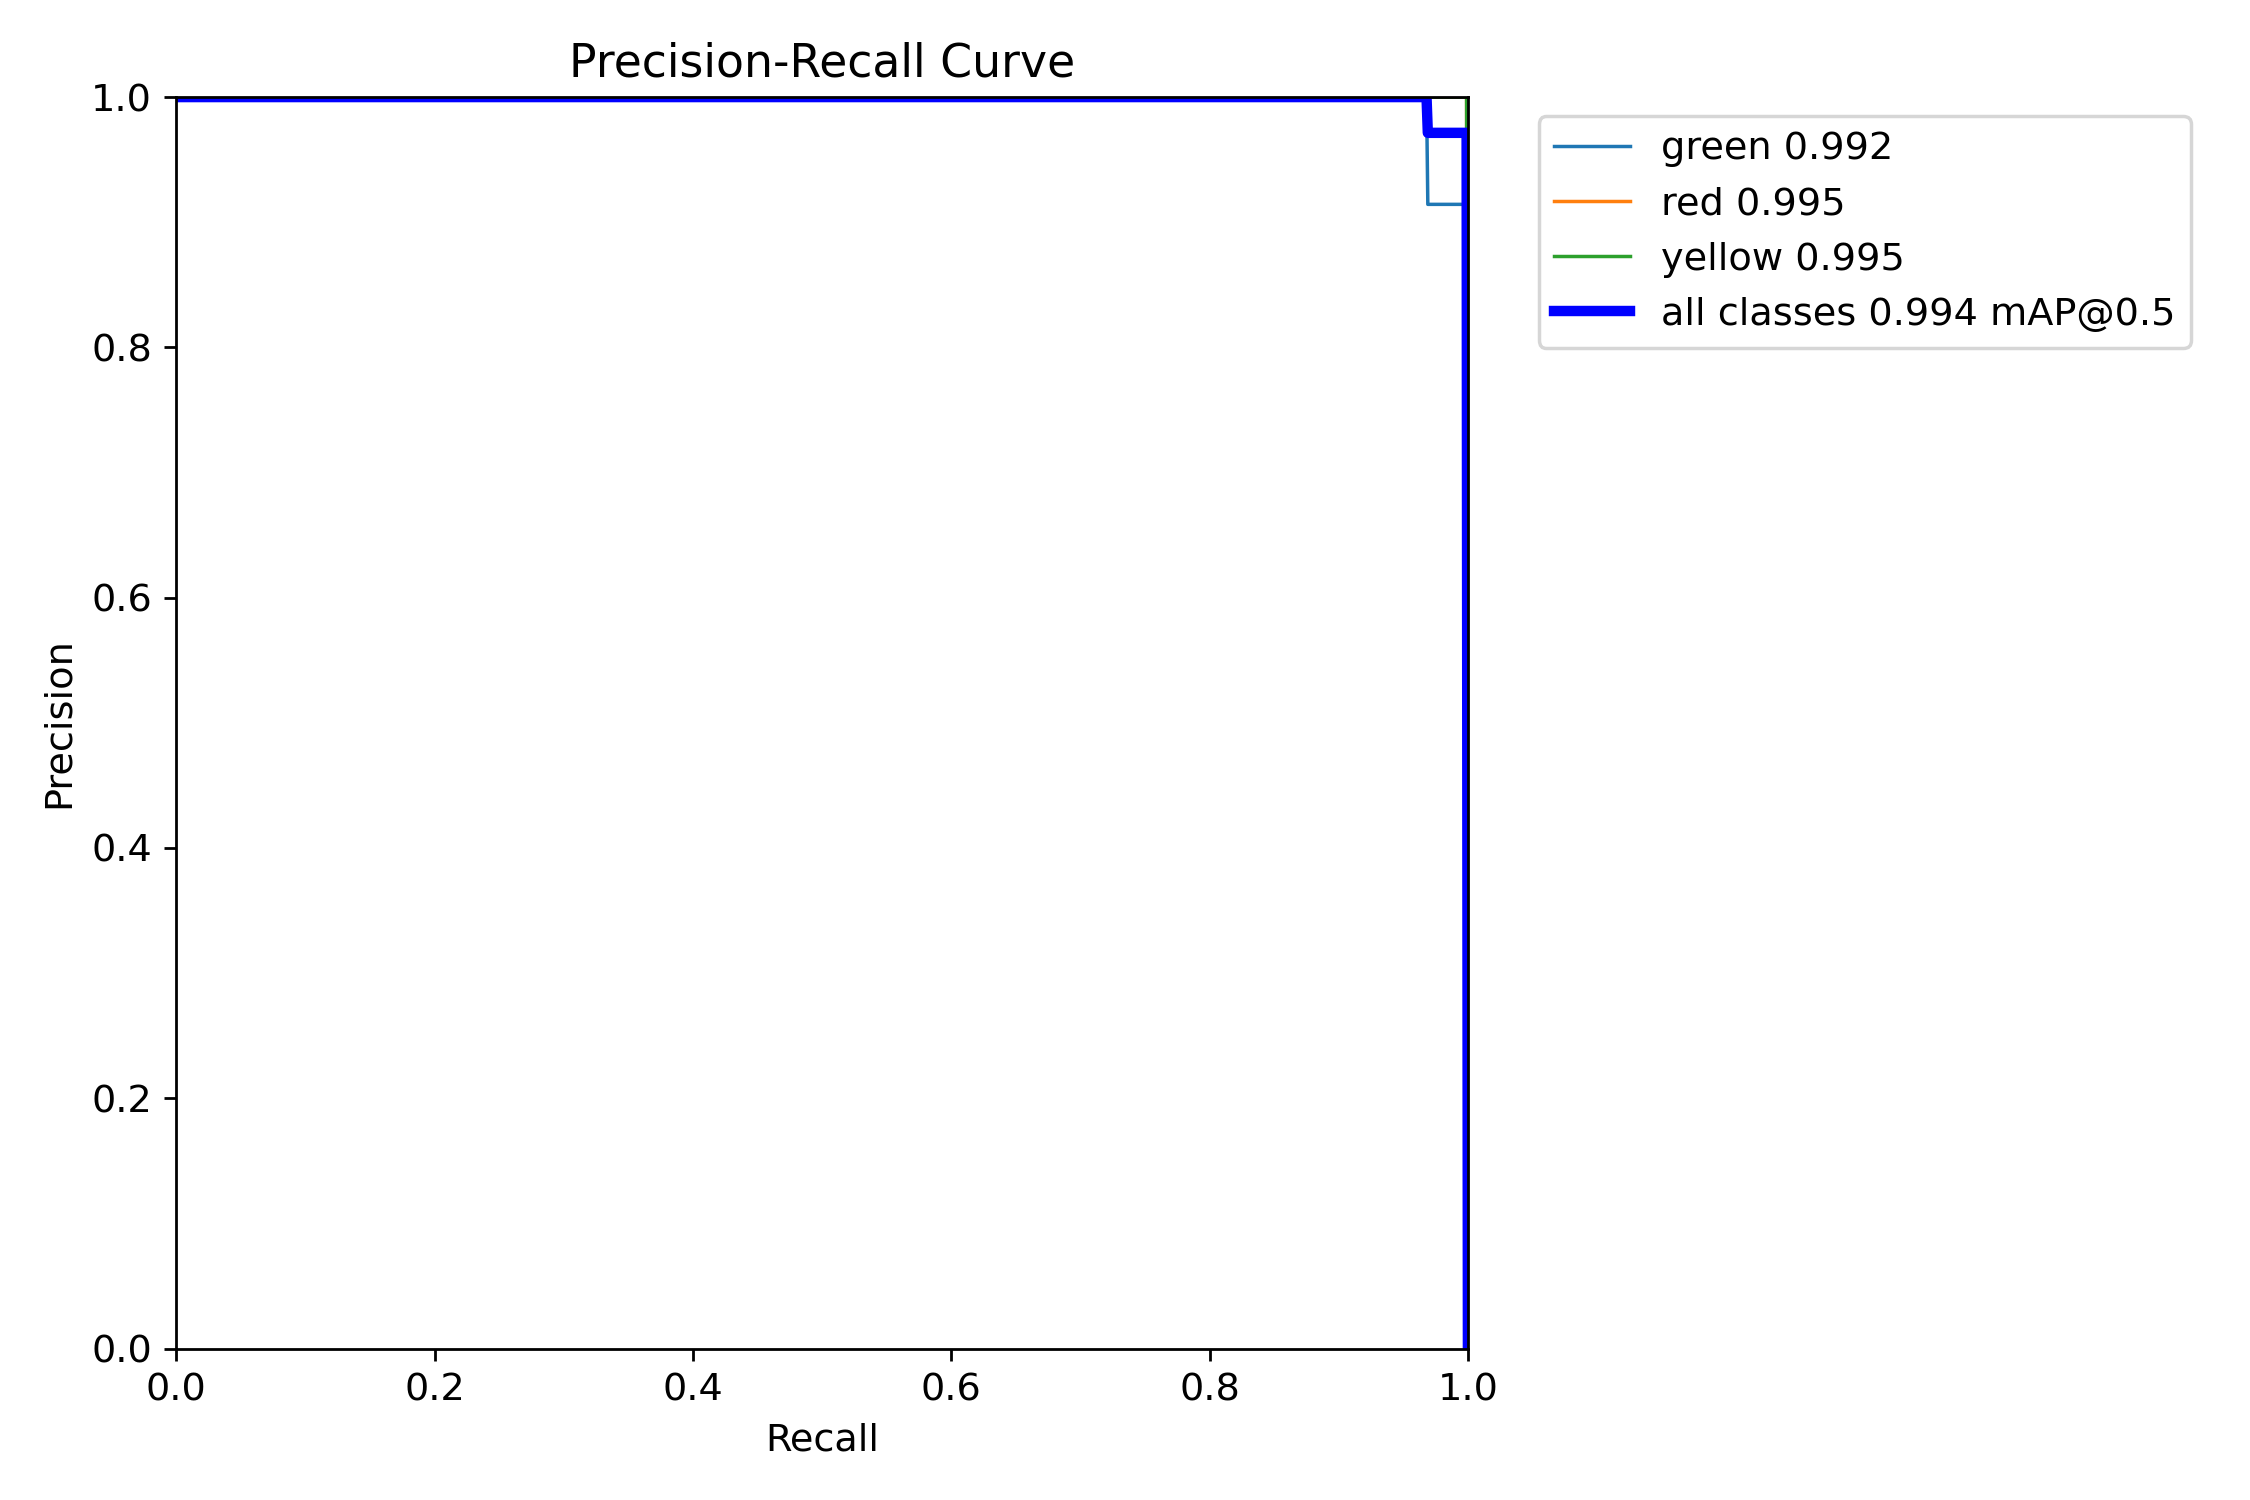

In [8]:
display(Image(filename='/content/runs/detect/train/BoxPR_curve.png', width=600))

# **Validate fine-tuned model**

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/traffic-light-1/data.yaml

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 101 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2003.5±435.8 MB/s, size: 54.2 KB)
val: Scanning /content/traffic-light-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 11.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.6it/s 1.5s
                   all         50         62      0.986      0.977      0.994      0.922
                 green         24         32          1      0.931      0.992      0.888
                   red         20         24      0.996          1      0.995      0.882
                yellow          6          6      0.962          1      0.995      0.995
Speed: 7.5ms preprocess, 8.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn mo

# **Inference with custom model**

In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/traffic-light-1/test/images save=True

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 101 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/574 /content/traffic-light-1/test/images/traffic-light-10-_jpg.rf.727cab2ec36e81af4c3368d4d8b5cced.jpg: 640x640 1 green, 11.4ms
image 2/574 /content/traffic-light-1/test/images/traffic-light-100-_jpg.rf.c441988d99a08b3e7fcc0be5b5edc73d.jpg: 640x640 1 red, 9.7ms
image 3/574 /content/traffic-light-1/test/images/traffic-light-1000-_jpg.rf.b3b1e4d6e71a75e51cbe21c9a04f0305.jpg: 640x640 1 red, 7.9ms
image 4/574 /content/traffic-light-1/test/images/traffic-light-101-_jpg.rf.519a07fe28ea83077ff1577a8dcbc1f3.jpg: 640x640 1 yellow, 7.9ms
image 5/574 /content/traffic-light-1/test/images/traffic-light-102-_jpg.rf.d2df952219e1486f46fc92477612998f.jpg: 640x640 1 green, 7.9ms
image 6/574 /content/traffic-light-1/test/images/traffic-light-103-_jpg.rf.f538aeabd5d84a7254d995e84b25075a.jpg: 640x640 1 red, 8.0ms
image 7/574 /content/tr

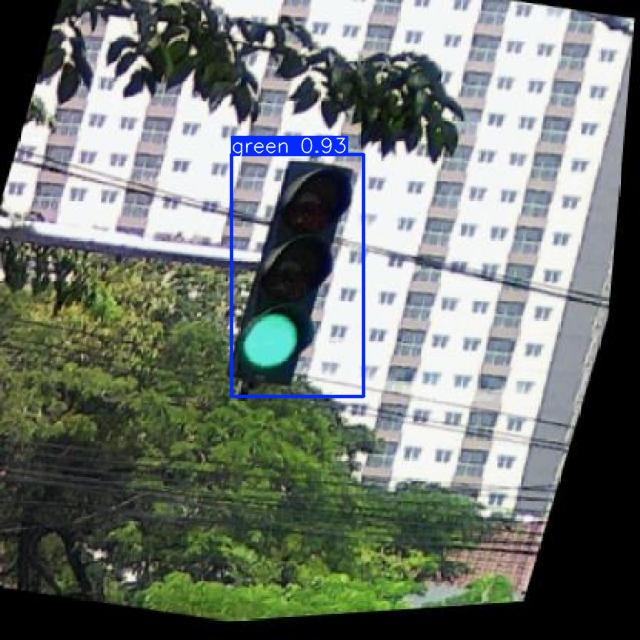

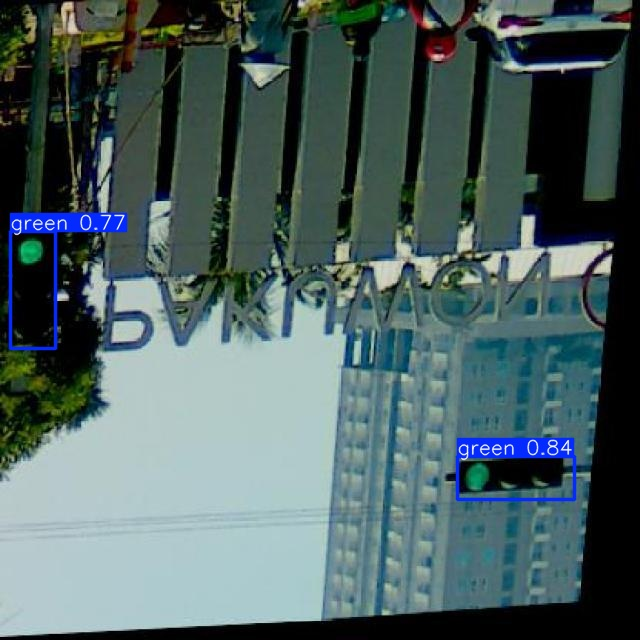

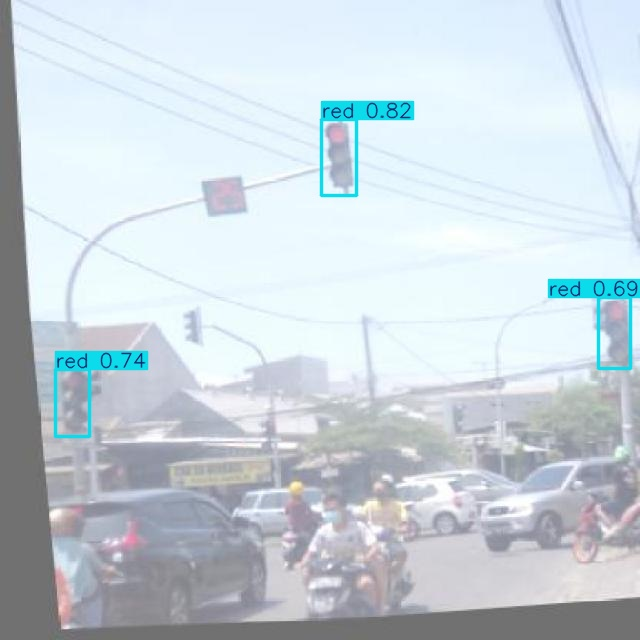

In [11]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")